# Thermal Denaturation with Circular Dichroism (222 nm)

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import peakutils
from scipy.signal import savgol_filter
import scipy.signal as signal
import statistics

In [2]:
spectra = np.genfromtxt('Thermal_PpiA_222.txt').T
spectra.shape

(6, 151)

<IPython.core.display.Javascript object>


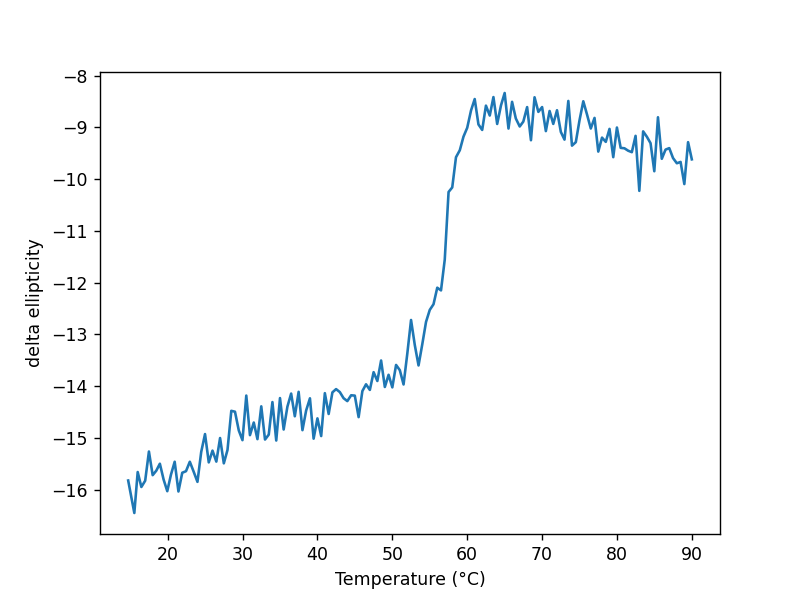

In [3]:
#plot all raw data
x=spectra[0]
y=spectra[1]
plt.xlabel('Temperature (°C)')
plt.ylabel('delta ellipticity')
plt.plot(x,y)

<IPython.core.display.Javascript object>


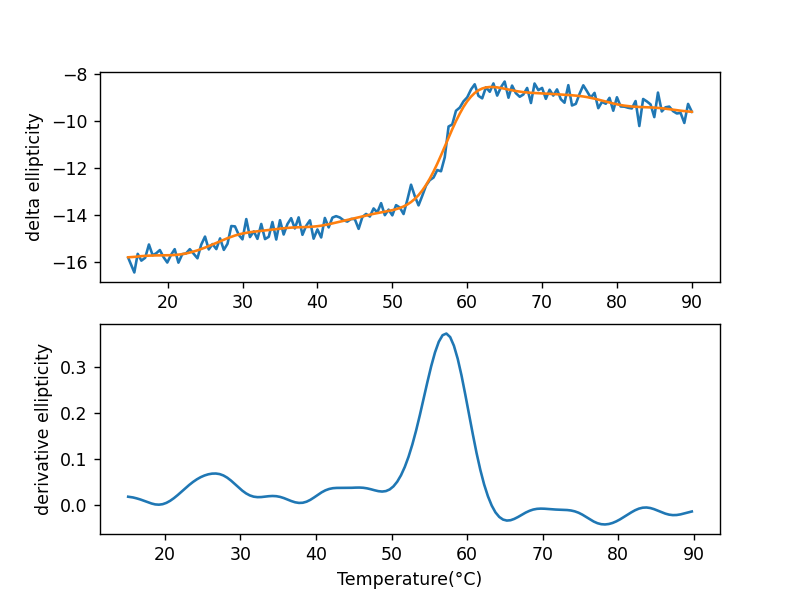

57.254999999999995

In [4]:
#Fitting CD data with smoothed curve
# Design the Buterworth filter
N  = 3    # Filter order
Wn = 0.1 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
smooth_data1 = signal.filtfilt(B,A,y)

#Plot the derivative of the ellipticity over temperature
yprime1 = np.diff(smooth_data1)
xprime1 = x[:-1]+0.5*np.diff(x)
fig,(ax1,ax2)=plt.subplots(2)
ax1.plot(x,y)
ax1.plot(x,smooth_data1)
ax2.plot(xprime1,yprime1)
#plt.plot(x,y)
plt.xlabel('Temperature(°C)')
ax1.set_ylabel('delta ellipticity')
ax2.set_ylabel('derivative ellipticity')

plt.show()

#Determine the transition temperature at the derivative maximum
np.argmax(yprime1)
xprime1[np.argmax(yprime1)]